In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [6]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)
     
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.406563,1.177976,0.263988,-2.001057,-1.365407,0
1,-0.188287,-2.380296,-1.457453,1.386940,0.001138,1
2,1.648660,1.174375,3.311043,-1.561925,-0.818031,0
3,1.204064,-0.112550,0.246714,-0.321127,-2.016283,0
4,1.801774,-2.016560,-1.916722,2.927649,-0.134044,1


In [7]:
# function for row sampling
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)
     

# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df
     

# function for combined sampling
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [8]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\rohit\AppData\Local\Temp\ipykernel_9412\529904865.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [9]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\rohit\AppData\Local\Temp\ipykernel_9412\529904865.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\rohit\AppData\Local\Temp\ipykernel_9412\529904865.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [11]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col2', 'target'], dtype='object')
Index(['col4', 'col1', 'target'], dtype='object')
Index(['col3', 'col5', 'target'], dtype='object')


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()
     

clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[1] <= -0.374\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.16666666666666666, 0.75, 'x[0] <= -2.367\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(0.08333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.5833333333333334, 'x[1] <= -0.845\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.16666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[1] <= -0.812\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4166666666666667, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8333333333333334, 0.75, 'x[1] <= 1.123\ngini = 0.328\nsamples = 29\nvalue = [23, 6]'),
 Text(0.75, 0.5833333333333334, 'x[0] <= -0.911\ngini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.6666666666666666, 0.4166666666666667, 'x[1] <= 0.219\ngini = 0.18\nsamples = 10\nvalue

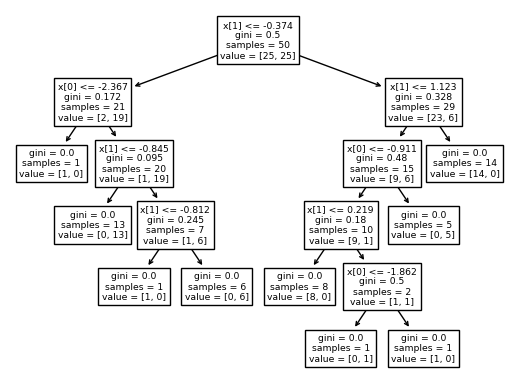

In [13]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.2857142857142857, 0.9285714285714286, 'x[0] <= -0.404\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.14285714285714285, 0.7857142857142857, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.42857142857142855, 0.7857142857142857, 'x[1] <= 0.648\ngini = 0.278\nsamples = 30\nvalue = [5, 25]'),
 Text(0.2857142857142857, 0.6428571428571429, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.5714285714285714, 0.6428571428571429, 'x[0] <= 1.137\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.42857142857142855, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7142857142857143, 0.5, 'x[0] <= 2.943\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.5714285714285714, 0.35714285714285715, 'x[0] <= 1.82\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.42857142857142855, 0.21428571428571427, 'x[1] <= 1.115\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2857142857142857, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5714285

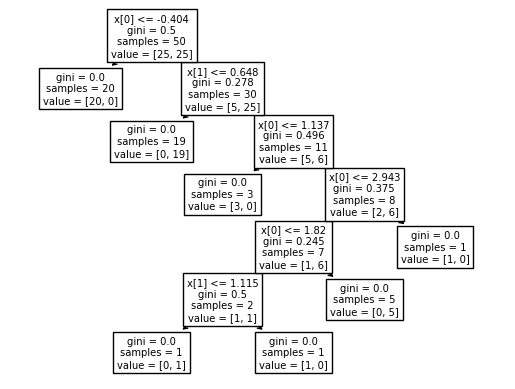

In [14]:
plot_tree(clf2)

[Text(0.4444444444444444, 0.9, 'x[0] <= 0.059\ngini = 0.487\nsamples = 50\nvalue = [21.0, 29.0]'),
 Text(0.2222222222222222, 0.7, 'x[0] <= -1.45\ngini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= -1.414\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6666666666666666, 0.7, 'x[1] <= -3.597\ngini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7777777777777778, 0.5, 'x[1] <= -2.163\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= -2.244\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.0\nsamples

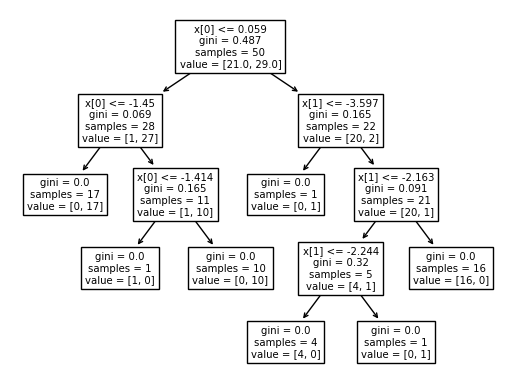

In [15]:
plot_tree(clf3)

In [16]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [17]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [18]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
76,-2.054971,-1.089229,0.407292,0.961554,-1.906939,1
37,-3.557398,-1.253894,0.414039,0.954370,-0.694018,1
47,1.473899,1.374197,4.311791,3.138913,-0.692536,0
12,-0.089451,-1.993503,-1.654486,-0.361750,-1.133246,1
35,0.329002,1.668063,-0.094933,-4.591659,-1.115717,0
96,-3.096441,-0.896504,-1.303709,1.258193,1.278748,1
98,0.635627,2.777733,2.055477,-2.621360,0.354338,0
71,-3.762326,1.070908,-0.667153,2.529209,0.501096,1
17,-0.057044,1.734916,-1.591633,-1.597617,-0.599242,0
67,0.894176,-2.923850,-2.602746,1.099247,0.911864,1
